In [23]:
import pickle
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [24]:
# Load the cleaned S&P 500 DataFrame from a pickle file
with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
    df_sp500 = pickle.load(file)
    
df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\giuli\AppData\Local\Temp\ipykernel_1192\1404194519.py:2: SyntaxWarning: invalid escape sequence '\p'
  with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
C:\Users\giuli\AppData\Local\Temp\ipykernel_1192\1404194519.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
C:\Users\giuli\AppData\Local\Temp\ipykernel_1192\1404194519.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


In [25]:
df_sp500

Ticker,TSLA,MLM,POOL,PAYX,JCI,GPC,CAH,AJG,DLTR,HOLX,...,RCL,PRU,GRMN,HAS,ESS,NUE,JBHT,AMAT,ACGL,PYPL
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-14 00:00:00+00:00,15.137333,98.845337,47.631180,31.855057,29.054077,65.548637,56.079235,36.220329,55.880001,23.920000,...,50.171078,52.597412,37.061481,39.956547,137.822662,38.207870,66.783379,16.996983,18.316668,36.709999
2014-10-15 00:00:00+00:00,15.313333,100.631470,47.970528,31.496561,28.512375,65.820229,55.064140,36.089497,55.240002,23.360001,...,48.691025,51.030968,37.849709,39.592178,138.176483,38.254654,66.946983,17.076080,17.916668,36.709999
2014-10-16 00:00:00+00:00,15.090000,104.286591,51.328083,31.525818,28.497742,66.423729,54.236980,35.885101,55.049999,23.150000,...,49.949516,51.660164,38.397095,39.504738,138.235413,38.628853,67.919609,17.462774,17.766666,36.709999
2014-10-17 00:00:00+00:00,15.165333,108.374489,50.801243,31.825790,29.420084,66.800919,55.357380,36.481945,56.580002,23.860001,...,51.145958,53.128288,38.127060,39.242382,137.630951,38.909504,68.092300,17.471556,18.123333,36.709999
2014-10-20 00:00:00+00:00,15.364667,110.114586,51.337040,32.008709,29.398130,67.472343,55.725842,36.694550,57.340000,24.010000,...,54.265591,53.088989,38.550365,41.180832,139.798157,39.353878,68.046844,17.638535,18.240000,36.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07 00:00:00+00:00,240.830002,518.650024,363.019989,136.533539,75.550003,134.990005,111.760002,286.899994,69.459999,79.879997,...,179.789993,120.459999,163.130005,72.489998,287.910004,152.750000,163.845398,200.130005,107.790001,80.260002
2024-10-08 00:00:00+00:00,244.500000,523.989990,364.940002,137.248795,76.349998,133.669998,112.620003,293.160004,69.480003,80.260002,...,183.389999,120.879997,164.630005,72.110001,288.480011,148.110001,164.902985,200.880005,109.910004,81.160004
2024-10-09 00:00:00+00:00,241.050003,531.159973,365.739990,138.917709,77.699997,133.759995,114.540001,294.940002,69.629997,80.120003,...,193.029999,122.120003,165.309998,72.239998,288.190002,151.820007,165.711136,205.059998,113.089996,81.650002


In [26]:
class DTWClustering:
    """
    A class for clustering using Euclidean and FastDTW distances with multiple methods (Hierarchical, KMeans, DBSCAN).
    
    How to compute clustering:
    Parameters:
        df (pd.DataFrame): Input dataframe containing time-series data, with rows as tickers and columns as timestamps.
    
    Methods:
        validate_dataframe(): Validates the input dataframe.
        standardization(): Standardizes the inputs, computes pct_change.
        preprocessing(): Computes percentage change and prepares dataframes for clustering and performance analysis.
        hierarchical_clustering(): Performs clustering using hierarchical methods (Euclidean or FastDTW distance).
        kmeans_clustering(): Performs clustering using KMeans (Euclidean or FastDTW distance).
        dbscan_clustering(): Performs clustering using DBSCAN (Euclidean or FastDTW distance).
        plot_dendrogram(): Plots the dendrogram for hierarchical clustering results.
        analyze_clusters(): Calculates silhouette scores and outputs analysis results.
        elbow_method(): Calculates the optimal number of K for kmeans clustering by plotting the curve to find the elbow.
    """
    
    def __init__(self, df):
        """
        Initialize the DTWClustering object.

        Args:
            df (pd.DataFrame): Input dataframe with time-series data.
        """
        self.df_actual = df
        self.df_pct_change = None
        self.validate_dataframe()

    def validate_dataframe(self):
        """
        Validate the input dataframe to ensure no missing or infinite values.
        """
        if not isinstance(self.df_actual, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        if self.df_actual.isnull().any().any():
            raise ValueError("Data contains missing values.")
        if not np.isfinite(self.df_actual.values).all():
            raise ValueError("Data contains infinite values.")
        if not np.issubdtype(self.df_actual.dtypes.values[0], np.number):
            raise ValueError("Data contains non-numeric values.")
            
    def preprocessing(self):
        """
        Transform the input dataframe by computing the percentage change for each value 
        relative to the previous row. This creates two dataframes:
        - self.df_actual: The actual values.
        - self.df_pct_change: The percentage change of the actual values.

        Notes:
            - The first row will contain NaN values after the percentage change.
            - NaN values are backward filled to handle missing data.
        """
        # Compute the percentage change
        pct_change_df = self.df_actual.pct_change()

        # Backward fill NaN values that result from the percentage change
        self.df_pct_change = pct_change_df.bfill()

        # Optional: Reset index to keep it clean (if needed)
        self.df_pct_change.reset_index(drop=True, inplace=True)

    def compute_fastdtw_distances(self, df_to_use):
        """
        Compute pairwise FastDTW distances for the dataset.

        Args:
            df_to_use (pd.DataFrame): The dataframe to use for distance calculation (either pct_change or actual values).

        Returns:
            np.ndarray: A condensed distance matrix for hierarchical clustering.
        """
        # Get the number of tickers (columns in df_to_use)
        n = df_to_use.shape[1]
        distances = []

        # Iterate over pairs of columns (tickers)
        for i in range(n):
            for j in range(i + 1, n):
                # Extract the time series for the two tickers (as 1D arrays)
                x = df_to_use.iloc[:, i].values.squeeze()  # Column i
                y = df_to_use.iloc[:, j].values.squeeze()  # Column j

                # Compute the FastDTW distance with Euclidean distance (dist=2)
                dist, _ = fastdtw(x, y, dist=2)
                distances.append(dist)

        return np.array(distances)

    def hierarchical_clustering(self, k=None, distance_metric="euclidean"):
        """
        Perform hierarchical clustering on the percentage change data using a specified distance metric.

        Args:
            k (int, optional): The desired number of clusters. If not provided, 
                                the user must specify the value of k.
            distance_metric (str, optional): The distance metric to use for clustering. 
                                            Can be one of 'euclidean' or 'fastdtw'. 
                                            Default is 'euclidean'.

        Returns:
            dict: A dictionary containing the results of the hierarchical clustering. 
                The dictionary includes:
                - 'linkage_matrix' (ndarray): The linkage matrix resulting from the hierarchical clustering.
                - 'clusters' (ndarray): The cluster labels for each data point.
                - 'silhouette' (float or str): The silhouette score of the clustering, or 'N/A' if the score cannot be computed (e.g., for non-Euclidean distance metrics).
                - 'time' (float): The time elapsed during the clustering process, in seconds.
        """
        start_time = time.time()
        data = self.df_pct_change.values.T

        # Calculate pairwise distances
        if distance_metric == "euclidean":
            pairwise_distances = pdist(data, metric="euclidean")  # Condensed matrix
            method = "ward"
        elif distance_metric == "fastdtw":
            pairwise_distances = self.compute_fastdtw_distances(self.df_pct_change)
            method = "average"
        else:
            raise ValueError(f"Unsupported distance metric: {distance_metric}")

        # Perform hierarchical clustering
        Z = linkage(pairwise_distances, method=method)

        # Ensure k is provided for clustering
        if k is None:
            raise ValueError("Please provide a value for k (number of clusters).")

        # Assign cluster labels
        clusters = fcluster(Z, k, criterion="maxclust")

        # Validate that at least 2 clusters are formed
        unique_clusters = len(set(clusters))
        if unique_clusters <= 1:
            raise ValueError(f"Only {unique_clusters} clusters were formed. Adjust k or check your data.")

        # Compute silhouette score only for Euclidean distances
        if distance_metric == "euclidean":
            silhouette = silhouette_score(data, clusters, metric="euclidean")
        else:
            silhouette = "N/A"

        elapsed_time = time.time() - start_time

        # Return clustering results
        return {
            "linkage_matrix": Z,
            "clusters": clusters,
            "silhouette": silhouette,
            "time": elapsed_time
        }

    def kmeans_clustering(self, k, distance_metric="euclidean"):
        """
        Perform KMeans clustering using specified distance metric.

        Args:
            k (int): Number of clusters.
            distance_metric (str): Distance metric ('euclidean' or 'fastdtw').

        Returns:
            dict: Clustering results, including cluster labels, silhouette score, and elapsed time.
        """
        data = self.df_pct_change.values.T
        if k <= 0:
            raise ValueError("k must be a positive integer.")

        start_time = time.time()
        
        if distance_metric == "euclidean":
        # Apply KMeans clustering on the percentage change data
            model = KMeans(n_clusters=k)
            clusters = model.fit_predict(data)  # Use pct_change data as input
        else:
            raise ValueError("KMeans does not support pairwise distance matrices directly. Consider using another clustering algorithm.")

        # Compute silhouette score
        if distance_metric == "euclidean":
            silhouette = silhouette_score(data, clusters, metric="euclidean")
        else:
            silhouette = "N/A"  # Cannot compute silhouette score for non-Euclidean distances
        elapsed_time = time.time() - start_time
        return {"clusters": clusters, "silhouette": silhouette, "time": elapsed_time}

    def dbscan_clustering(self, eps=0.5, min_samples=5, distance_metric="euclidean"):
        """
        Perform DBSCAN clustering using specified distance metric.

        Args:
            eps (float): Maximum distance between two samples to be considered as in the same neighborhood.
            min_samples (int): Minimum number of samples in a neighborhood to form a cluster.
            distance_metric (str): Distance metric ('euclidean' or 'fastdtw').

        Returns:
            dict: Clustering results, including cluster labels and elapsed time.
        """
        start_time = time.time()
        data = self.df_pct_change.values.T
        # Compute pairwise distances
        if distance_metric == "euclidean":
            pairwise_distances = pdist(data, metric="euclidean")
        elif distance_metric == "fastdtw":
            pairwise_distances = self.compute_fastdtw_distances(self.df_pct_change)
        else:
            raise ValueError("Unsupported distance metric. Use 'euclidean' or 'fastdtw'.")

        # Convert pairwise_distances into a square matrix
        pairwise_distances_square = squareform(pairwise_distances)

        # Apply DBSCAN clustering with the precomputed distance matrix
        model = DBSCAN(metric="precomputed", eps=eps, min_samples=min_samples)
        clusters = model.fit_predict(pairwise_distances_square)

        # Calculate elapsed time
        elapsed_time = time.time() - start_time

        # Optionally, compute silhouette score, excluding noise points (-1)
        if len(set(clusters)) > 1:  # Make sure there is more than one cluster (excluding noise)
            valid_clusters = clusters != -1
            if valid_clusters.any():  # Ensure there are valid points to calculate silhouette score
                silhouette = silhouette_score(data[valid_clusters], clusters[valid_clusters], metric="euclidean")
            else:
                silhouette = "N/A"
        else:
            silhouette = "N/A"

        return {"clusters": clusters, "silhouette": silhouette, "time": elapsed_time}
    
    def plot_dendrogram(self, Z, title="Dendrogram"):
        """
        Plot a dendrogram from a linkage matrix.

        Args:
            Z (array): Linkage matrix.
            title (str): Title for the plot.
        """
        plt.figure(figsize=(10, 6))
        dendrogram(Z)
        plt.title(title)
        plt.xlabel("Cluster Size")
        plt.ylabel("Distance")
        plt.show()
        
    def analyze_clusters(self, clustering_results, k, title_prefix=""):
        """
        Analyze clusters, calculate and display cluster-level statistics based on actual values.

        Args:
            clustering_results (dict): Output from clustering method.
            k (int): Number of clusters.
            title_prefix (str): Prefix for titles in outputs.
        """
        clusters = clustering_results["clusters"]
        cluster_labels = np.unique(clusters)
        stats = []

        for label in cluster_labels:
            idx = np.where(clusters == label)
            cluster_data = self.df_actual.iloc[idx]
            total_return = cluster_data.sum().sum()
            average = cluster_data.mean().mean()
            variance = cluster_data.var().mean()
            stats.append({"Cluster": label, "Total Return": total_return, "Average": average, "Variance": variance})

        stats_df = pd.DataFrame(stats)
        print(f"\n{title_prefix} Cluster Analysis")
        print(stats_df)

    def elbow_method(self, max_k=10):
        """
        Plot the curve to identify the 'elbow' that corresponds to the optimal number of clusters (K).
        """
        sse = []  # Sum of squared errors for each K
        k_rng = range(1, max_k + 1)  # Test K values from 1 to max_k

        # Compute SSE for each value of K
        for k in k_rng:
            kmeans = KMeans(n_clusters=k, random_state=42)  # Random state for reproducibility
            kmeans.fit(self.df_pct_change.values)  # Fit KMeans to the pct_change data
            sse.append(kmeans.inertia_)  # Append the inertia (SSE)

        # Plot the SSE curve
        plt.figure(figsize=(8, 6))  # Set figure size
        plt.plot(k_rng, sse, linewidth=2, marker='o', linestyle='--', color='b')
        plt.title("Elbow Method for Optimal K")
        plt.xlabel("Number of Clusters (K)")
        plt.ylabel("Sum of Squared Errors (SSE)")
        plt.grid(True)  # Add gridlines for better visibility
        plt.xticks(k_rng)  # Ensure all K values appear on the x-axis
        plt.show()
        


In [27]:
print(df_sp500.index)  # Check the first 50 timestamps


DatetimeIndex(['2014-10-14 00:00:00+00:00', '2014-10-15 00:00:00+00:00',
               '2014-10-16 00:00:00+00:00', '2014-10-17 00:00:00+00:00',
               '2014-10-20 00:00:00+00:00', '2014-10-21 00:00:00+00:00',
               '2014-10-22 00:00:00+00:00', '2014-10-23 00:00:00+00:00',
               '2014-10-24 00:00:00+00:00', '2014-10-27 00:00:00+00:00',
               ...
               '2024-09-30 00:00:00+00:00', '2024-10-01 00:00:00+00:00',
               '2024-10-02 00:00:00+00:00', '2024-10-03 00:00:00+00:00',
               '2024-10-04 00:00:00+00:00', '2024-10-07 00:00:00+00:00',
               '2024-10-08 00:00:00+00:00', '2024-10-09 00:00:00+00:00',
               '2024-10-10 00:00:00+00:00', '2024-10-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2516, freq=None)


In [28]:
# Take the first 50 timestamps from df_sp500
#df_sp500_first_50 = df_sp500.iloc[:20]  # This selects the first 50 rows

# Initialize the DTWClustering with the sliced DataFrame
dtw_clustering = DTWClustering(df_sp500)

dtw_clustering.preprocessing()

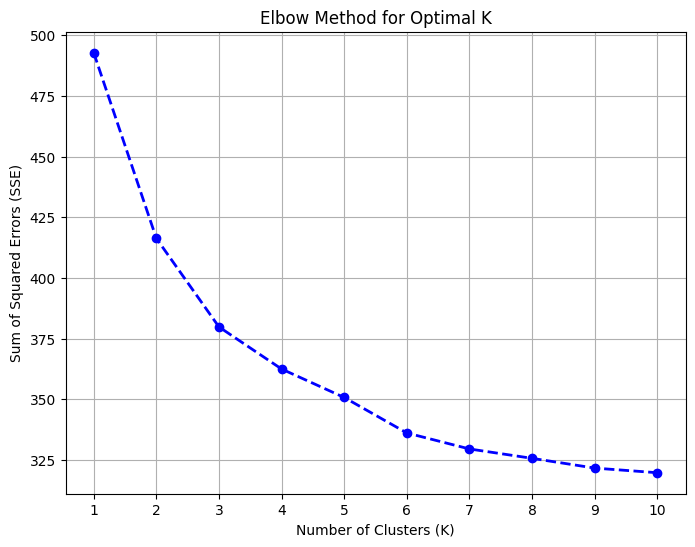

In [29]:
#elbow method for kmeans clustering
dtw_clustering.elbow_method()

In [ ]:
# Hierarchical Clustering with FastDTW Distance
print("\nHierarchical Clustering with FastDTW Distance:")
hierarchical_results_fastdtw = dtw_clustering.hierarchical_clustering(k=4, distance_metric="fastdtw")
print(hierarchical_results_fastdtw)

In [ ]:
hierarchical_cluster_fastDTW=hierarchical_results_fastdtw["clusters"] -1

In [32]:
# Hierarchical Clustering with Euclidean Distance
print("\nHierarchical Clustering with Euclidean Distance:")
hierarchical_results_euclidean = dtw_clustering.hierarchical_clustering(k=4, distance_metric="euclidean")
print(hierarchical_results_euclidean)


Hierarchical Clustering with Euclidean Distance:
{'linkage_matrix': array([[1.66000000e+02, 2.90000000e+02, 3.04046069e-01, 2.00000000e+00],
       [4.40000000e+01, 1.26000000e+02, 3.17744307e-01, 2.00000000e+00],
       [3.73000000e+02, 4.15000000e+02, 3.18292185e-01, 2.00000000e+00],
       ...,
       [9.22000000e+02, 9.32000000e+02, 4.85515054e+00, 1.90000000e+02],
       [9.31000000e+02, 9.34000000e+02, 5.29260766e+00, 2.44000000e+02],
       [9.33000000e+02, 9.35000000e+02, 5.99018336e+00, 4.69000000e+02]]), 'clusters': array([2, 4, 4, 1, 4, 4, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 3, 4, 1, 4, 4,
       1, 4, 4, 2, 4, 4, 2, 3, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1,
       1, 1, 1, 4, 1, 4, 3, 1, 1, 2, 2, 4, 4, 1, 1, 1, 1, 4, 4, 4, 2, 2,
       4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 4, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2,
       2, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 4, 4, 4, 1, 3, 1, 3, 1, 4, 1, 4,
       1, 1, 1, 2, 4, 1, 1, 1, 4, 4, 1, 4, 4, 2, 1, 3, 1, 4, 4, 2, 1, 4,
       4, 2, 3, 1, 1, 2, 1, 1

In [33]:
hierarchical_cluster_euclidean=hierarchical_results_euclidean["clusters"] -1

In [34]:
# KMeans Clustering with Euclidean Distance
print("\nKMeans Clustering with Euclidean Distance:")
kmeans_results_euclidean = dtw_clustering.kmeans_clustering(k=4, distance_metric="euclidean")
print(kmeans_results_euclidean)


KMeans Clustering with Euclidean Distance:
{'clusters': array([3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 3, 1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 3, 2, 2, 1, 2, 3,
       3, 1, 2, 1, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 3, 0, 3, 2, 2, 2, 2, 2, 0, 1, 3, 2, 1, 2, 2, 0, 3, 2, 1,
       1, 3, 1, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       1, 3, 1, 1, 2, 3, 1, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2,
       1, 1, 3, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1,
       2, 2, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 

In [35]:
kmeans_cluster_euclidean=kmeans_results_euclidean["clusters"]

In [36]:
dtw_clustering_transposed_actual_values = dtw_clustering.df_actual.T

dtw_clustering_transposed_actual_values['Hierarchical Cluster Euclidean'] = hierarchical_cluster_euclidean

dtw_clustering_transposed_actual_values['Hierarchical Cluster DTW'] = hierarchical_cluster_fastDTW

dtw_clustering_transposed_actual_values['Kmeans Clustering'] = kmeans_cluster_euclidean

NameError: name 'hierarchical_cluster_fastDTW' is not defined

In [37]:
dtw_clustering_transposed_pctchange = dtw_clustering.df_pct_change.T

dtw_clustering_transposed_pctchange['Hierarchical Cluster Euclidean'] = hierarchical_cluster_euclidean

dtw_clustering_transposed_pctchange['Hierarchical Cluster DTW'] = hierarchical_cluster_fastDTW

dtw_clustering_transposed_pctchange['Kmeans Clustering'] = kmeans_cluster_euclidean

NameError: name 'hierarchical_cluster_fastDTW' is not defined


Plotting Dendrogram for Euclidean Hierarchical Clustering:


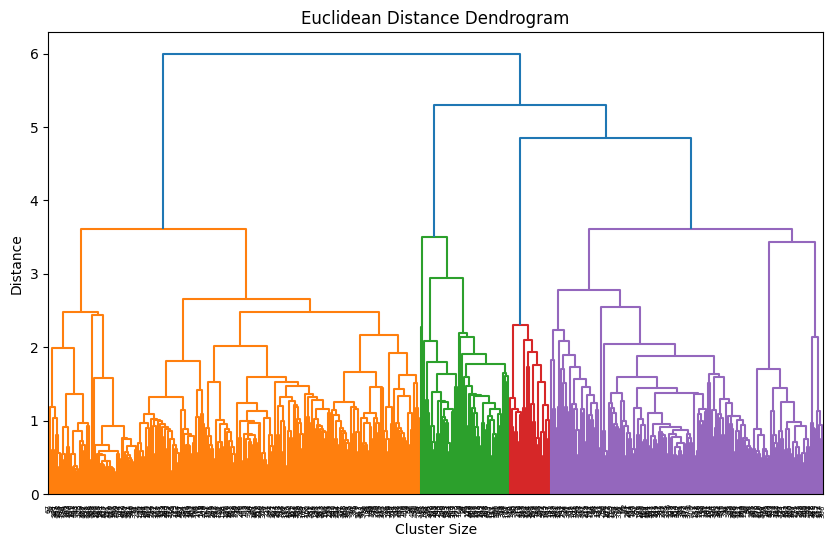


Plotting Dendrogram for FastDTW Hierarchical Clustering:


NameError: name 'hierarchical_results_fastdtw' is not defined

In [38]:
# Plot dendrograms
print("\nPlotting Dendrogram for Euclidean Hierarchical Clustering:")
dtw_clustering.plot_dendrogram(hierarchical_results_euclidean["linkage_matrix"], title="Euclidean Distance Dendrogram")

print("\nPlotting Dendrogram for FastDTW Hierarchical Clustering:")
dtw_clustering.plot_dendrogram(hierarchical_results_fastdtw["linkage_matrix"], title="FastDTW Distance Dendrogram")

# Analyze clusters for both hierarchical methods
print("\nCluster Analysis for Euclidean Hierarchical Clustering:")
dtw_clustering.analyze_clusters(hierarchical_results_euclidean, k=3, title_prefix="Euclidean Hierarchical")

print("\nCluster Analysis for FastDTW Hierarchical Clustering:")
dtw_clustering.analyze_clusters(hierarchical_results_fastdtw, k=4, title_prefix="FastDTW Hierarchical")


In [46]:
df = dtw_clustering.df_actual 

df

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(df_actual, df_pct_change, cluster_labels, cluster_method_name):
    """
    Plot time series data for each cluster in two subplots: one for pct change and one for actual values.

    Args:
        df_actual (pd.DataFrame): DataFrame containing the actual stock values (tickers as rows, timestamps as columns).
        df_pct_change (pd.DataFrame): DataFrame containing the percentage change of stock values (tickers as rows, timestamps as columns).
        cluster_labels (array-like): Cluster labels for each stock (same length as number of rows in df_actual).
        cluster_method_name (str): Name of the clustering method (e.g., 'Hierarchical_Cluster').
    """
    # Create a mapping of cluster labels to the corresponding tickers (rows of the DataFrame)
    clusters_time_series = {}
    tickers = df_actual.index  # Assuming rows represent tickers

    # Ensure tickers_in_cluster corresponds to tickers (rows)
    for cluster in np.unique(cluster_labels):
        # Get tickers belonging to the current cluster
        tickers_in_cluster = tickers[np.array(cluster_labels) == cluster]
        
        # Select rows corresponding to these tickers (no need to transpose data, since tickers are rows)
        data_actual = df_actual.loc[tickers_in_cluster]
        data_pct_change = df_pct_change.loc[tickers_in_cluster]

        clusters_time_series[cluster] = (data_actual, data_pct_change)

    # Create a plot with subplots (up to 4 clusters)
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, (cluster, (data_actual, _)) in enumerate(clusters_time_series.items()):
        if len(data_actual.index) == 0:  # Skip empty clusters
            continue

        ax = axes[i]
        ax.set_title(f"Cluster {cluster} - Actual Values ({len(data_actual.index)} Tickers)")
        for row in data_actual.index:  # Iterate through tickers (rows)
            ax.plot(data_actual.columns, data_actual.loc[row], label=row)
        ax.set_xlabel("Timestamp")
        ax.set_ylabel("Stock Value (Actual)")
        ax.grid(True)

    fig.suptitle(f"Stock Clusters - {cluster_method_name} (Actual Values)", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Plot percentage change time series
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, (cluster, (_, data_pct_change)) in enumerate(clusters_time_series.items()):
        if len(data_pct_change.index) == 0:  # Skip empty clusters
            continue

        ax = axes[i]
        ax.set_title(f"Cluster {cluster} - Percentage Change ({len(data_pct_change.index)} Tickers)")
        for row in data_pct_change.index:  # Iterate through tickers (rows)
            ax.plot(data_pct_change.columns, data_pct_change.loc[row], label=row)
        ax.set_xlabel("Timestamp")
        ax.set_ylabel("Percentage Change")
        ax.grid(True)

    fig.suptitle(f"Stock Clusters - {cluster_method_name} (Pct Change)", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


In [43]:
hierarchical_labels_euclidean = 'Hierarchical Cluster Euclidean'
kmeans_labels_euclidean = 'Kmeans Clustering'

# Assuming hierarchical_labels_euclidean and kmeans_labels_euclidean are the clustering labels
plot_clusters(
    df_actual=dtw_clustering.df_actual.T,
    df_pct_change=dtw_clustering.df_pct_change.T,
    cluster_labels=hierarchical_labels_euclidean,
    cluster_method_name="Hierarchical_Cluster"
)

plot_clusters(
    df_actual=dtw_clustering.df_actual.T,
    df_pct_change=dtw_clustering.df_pct_change.T,
    cluster_labels=kmeans_labels_euclidean,
    cluster_method_name="KMeans_Cluster"
)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.